In [1]:
#author: Samruda Pobbathi
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout
from keras.utils import to_categorical 
from keras.optimizers import Adam,SGD
from sklearn.metrics import accuracy_score
from keras.layers import LeakyReLU
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
import math
from tensorflow.keras.callbacks import ReduceLROnPlateau,LearningRateScheduler,ModelCheckpoint,EarlyStopping,TensorBoard
# Set a seed value
# seed_value= 12321 
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
# import os
# os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
# import random
# random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
# import numpy as np
# np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
# tf.set_random_seed(seed_value)


Using TensorFlow backend.


In [2]:
loc ='/Users/samruda/Predicting-User-Age-by-Mobile-Phone-Meta-Data/cs597_project/data/gender_data.csv'

gender_data = pd.read_csv(loc,index_col=0)
# gender_data.index = np.arange(0, len(actual_data))
len(list(gender_data))
corr_matrix = gender_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#Removing features with correlation above 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(len(to_drop))
gender_data.drop(to_drop, axis=1, inplace=True)
gender_data.shape
# gender_data.dropna().to_csv('/Users/samruda/Predicting-User-Age-by-Mobile-Phone-Meta-Data/cs597_project/data/gender_data_preprocessed.csv')


# gender_data.fillna(method="bfill", inplace=True)

gender_data.shape

7


(14549, 112)

NameError: name 'plt' is not defined

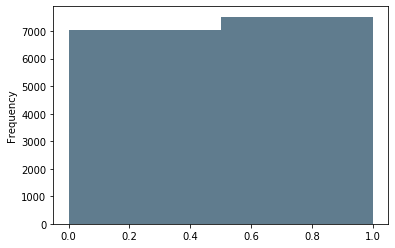

In [34]:
# gender_data['GENDER'].plot.hist(bins=2,grid=0)

gender_data['GENDER'].plot.hist( bins=2, rwidth=1,color='#607c8e',figsize=(6,4))
plt.title('GENDER')
plt.xlabel('GENDER')
plt.ylabel('Counts ')
plt.grid(axis='x')
plt.xticks([0,1])
plt.show()


In [ ]:
# # Seaborn visualization library
# import seaborn as sns
# # Create the default pairplot
# sns.pairplot(gender_data)

In [17]:
import pickle
# Function importing Dataset 
def importdata(): 
# 	balance_data = pd.read_csv( 
# 'https://archive.ics.uci.edu/ml/machine-learning-'+
# 'databases/balance-scale/balance-scale.data', 
# 	sep= ',', header = None) 
	balance_data = gender_data.dropna()
	# Printing the dataswet shape 
	print ("Dataset Length: ", len(balance_data)) 
	print ("Dataset Shape: ", balance_data.shape) 
	
	# Printing the dataset obseravtions 
# 	print ("Dataset: ",balance_data.head()) 
	return balance_data 

# Function to split the dataset 
def splitdataset(balance_data): 

	# Separating the target variable 
	X = balance_data.values[:, 0:110] 
	Y = balance_data.values[:, 111] 
	
    
	# Splitting the dataset into train and test 
	X_train, X_test, y_train, y_test = train_test_split( 
	X, Y, test_size = 0.3, random_state = 100) 
	
	return X, Y, X_train, X_test, y_train, y_test 
	
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 

	# Creating the classifier object 
	clf_gini = DecisionTreeClassifier(criterion = "gini", 
			random_state = 100,max_depth=10, min_samples_leaf=1) 

	# Performing training 
	clf_gini.fit(X_train, y_train) 
	return clf_gini 
	
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 

	# Decision tree with entropy 
	clf_entropy = DecisionTreeClassifier( 
			criterion = "entropy", random_state = 100, 
			max_depth = 10, min_samples_leaf = 10) 

	# Performing training 
	clf_entropy.fit(X_train, y_train) 
	filename = r'/Users/samruda/Predicting-User-Age-by-Mobile-Phone-Meta-Data/cs597_project/training_1/Decision_tree.sav'
	pickle.dump(model, open(filename, 'wb'))
	return clf_entropy 


# Function to make predictions 
def prediction(X_test, clf_object): 

	# Predicton on test with giniIndex 
	y_pred = clf_object.predict(X_test) 
	print("Predicted values:") 
	print(y_pred) 
	return y_pred 
	
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
	
	print("Confusion Matrix: ", 
		confusion_matrix(y_test, y_pred)) 
	
	print ("Accuracy : ", 
	accuracy_score(y_test,y_pred)*100) 
	
	print("Report : ", 
	classification_report(y_test, y_pred)) 

# Driver code 
def main(): 
	
	# Building Phase 
	data = importdata() 
	X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
# 	clf_gini = train_using_gini(X_train, X_test, y_train) 
	clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
	
# 	# Operational Phase 
# 	print("Results Using Gini Index:") 
	
# 	# Prediction using gini 
# 	y_pred_gini = prediction(X_test, clf_gini) 
# 	cal_accuracy(y_test, y_pred_gini) 
	
	print("Results Using Entropy:") 
	# Prediction using entropy 
	y_pred_entropy = prediction(X_test, clf_entropy) 
	cal_accuracy(y_test, y_pred_entropy) 
	
	
# Calling main function 
if __name__=="__main__": 
	main() 




Dataset Length:  10789
Dataset Shape:  (10789, 112)
Results Using Entropy:
Predicted values:
[0. 1. 1. ... 1. 0. 1.]
Confusion Matrix:  [[1008  595]
 [ 655  979]]
Accuracy :  61.38399752857584
Report :                precision    recall  f1-score   support

         0.0       0.61      0.63      0.62      1603
         1.0       0.62      0.60      0.61      1634

    accuracy                           0.61      3237
   macro avg       0.61      0.61      0.61      3237
weighted avg       0.61      0.61      0.61      3237



In [26]:
#Random forest:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, Y, X_train, X_test, y_train, y_test = splitdataset(gender_data.dropna()) 
clf = RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
filename = r'/Users/samruda/Predicting-User-Age-by-Mobile-Phone-Meta-Data/cs597_project/training_1/RandomForestClassifier.sav'
pickle.dump(model, open(filename, 'wb'))


Confusion Matrix:
[[ 946  657]
 [ 473 1161]]
              precision    recall  f1-score   support

         0.0       0.67      0.59      0.63      1603
         1.0       0.64      0.71      0.67      1634

    accuracy                           0.65      3237
   macro avg       0.65      0.65      0.65      3237
weighted avg       0.65      0.65      0.65      3237



In [18]:
# gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

X, Y, X_train, X_test, y_train, y_test = splitdataset(gender_data.dropna()) 
# evaluate the model
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=2, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# # fit the model on the whole dataset
# # model = GradientBoostingClassifier()
model.fit(X_train, y_train)

yhat = model.predict(X_test)
print('Prediction:', yhat)
print('Confusion Matrix:')
print(confusion_matrix(y_test, yhat))
print('Accuracy:',accuracy_score(y_test, yhat))
print("Report : ", 
classification_report(y_test, yhat)) 
filename = r'/Users/samruda/Predicting-User-Age-by-Mobile-Phone-Meta-Data/cs597_project/training_1/GradientBoosting.sav'
pickle.dump(model, open(filename, 'wb'))


Accuracy: 0.676 (0.014)
Prediction: [0. 1. 1. ... 1. 0. 1.]
Confusion Matrix:
[[ 967  636]
 [ 454 1180]]
Accuracy: 0.6632684584491814
Report :                precision    recall  f1-score   support

         0.0       0.68      0.60      0.64      1603
         1.0       0.65      0.72      0.68      1634

    accuracy                           0.66      3237
   macro avg       0.67      0.66      0.66      3237
weighted avg       0.66      0.66      0.66      3237



In [13]:

def build_model_gender():
    model = tf.keras.Sequential()
    model.add(layers.Dropout(0.2,input_shape=(110,)))
    model.add(layers.Dense(110,activation='relu',input_shape=(110,)))
    model.add(layers.Dense(30,activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(0.01), 
                  metrics=['accuracy'])

    return model




In [14]:
log_dir= '/Users/samruda/Predicting-User-Age-by-Mobile-Phone-Meta-Data/cs597_project/training_1'
accuracies = []
for i in range(10):
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath=log_dir,
        save_weights_only=True,
        monitor= 'val_accuracy',
        save_best_only=True)

    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, verbose=1)
    early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1)

    EPOCHS = 60
    result_two = []

    X_new = gender_data.dropna().drop('GENDER',axis = 1)
    X_new = X_new.dropna().drop('AGE',axis = 1)
    X_new = (X_new-X_new.mean())/X_new.std()

    Y_new = gender_data.dropna()['GENDER']

    datax = X_new.values
    datay = Y_new.values
    trainx, testx, trainy, testy = train_test_split(datax, datay, test_size=0.2, random_state = 1)
    print("Train X: ",trainx.shape)
    print("Train Y:",trainy.shape)

    model = build_model_gender()
    history = model.fit(trainx, trainy, epochs=EPOCHS,
                        validation_split=0.2, 
                        batch_size=20,
                        callbacks = [early_stopping,reduce_lr,checkpoint])

    model.save_weights(log_dir + '/trained_weights_Gender_pred'+str(i)+'.h5')
    
    yhat = model.predict(testx) 

    y_h = []
    for y in yhat:
        if y >= 0.5:
            y_h.append(1)
        else :
            y_h.append(0)

    print('Accuracy in round'+str(i),accuracy_score(testy, y_h))
    accuracies.append(accuracy_score(testy, y_h))

Train X:  (8631, 110)
Train Y: (8631,)
Epoch 1/60
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
324/346 [===========================>..] - ETA: 0s - loss: 0.6843 - accuracy: 0.5980WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x1a3b7b5510> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export 

324/346 [===========================>..] - ETA: 0s - loss: 0.6902 - accuracy: 0.5994WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x1a38b72ea0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
346/346 [==============================] - 1s 2ms/step - loss: 0.6879 - accuracy: 0.5989 - val_loss: 0.6381 - val_accuracy: 0.6433 - lr: 0.0100
Epoch 2/60
34

346/346 [==============================] - 1s 3ms/step - loss: 0.6213 - accuracy: 0.6567 - val_loss: 0.6207 - val_accuracy: 0.6618 - lr: 0.0100
Epoch 6/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6144 - accuracy: 0.6619 - val_loss: 0.6188 - val_accuracy: 0.6630 - lr: 0.0100
Epoch 7/60
346/346 [==============================] - 1s 3ms/step - loss: 0.6120 - accuracy: 0.6628 - val_loss: 0.6207 - val_accuracy: 0.6624 - lr: 0.0100
Epoch 8/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6138 - accuracy: 0.6616 - val_loss: 0.6188 - val_accuracy: 0.6589 - lr: 0.0100
Epoch 9/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6117 - accuracy: 0.6687 - val_loss: 0.6225 - val_accuracy: 0.6589 - lr: 0.0100
Epoch 10/60
346/346 [==============================] - 1s 3ms/step - loss: 0.6096 - accuracy: 0.6695 - val_loss: 0.6250 - val_accuracy: 0.6613 - lr: 0.0100
Epoch 11/60
344/346 [============================>.] - ETA: 0s - loss: 0.6093 - 

346/346 [==============================] - 1s 2ms/step - loss: 0.6221 - accuracy: 0.6499 - val_loss: 0.6214 - val_accuracy: 0.6549 - lr: 0.0100
Epoch 5/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6212 - accuracy: 0.6563 - val_loss: 0.6185 - val_accuracy: 0.6526 - lr: 0.0100
Epoch 6/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6171 - accuracy: 0.6576 - val_loss: 0.6181 - val_accuracy: 0.6589 - lr: 0.0100
Epoch 7/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6161 - accuracy: 0.6661 - val_loss: 0.6173 - val_accuracy: 0.6520 - lr: 0.0100
Epoch 8/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6113 - accuracy: 0.6666 - val_loss: 0.6167 - val_accuracy: 0.6601 - lr: 0.0100
Epoch 9/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6090 - accuracy: 0.6687 - val_loss: 0.6161 - val_accuracy: 0.6561 - lr: 0.0100
Epoch 10/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6081

Epoch 10/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6099 - accuracy: 0.6667 - val_loss: 0.6150 - val_accuracy: 0.6526 - lr: 0.0100
Epoch 11/60
336/346 [============================>.] - ETA: 0s - loss: 0.6070 - accuracy: 0.6707
Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
346/346 [==============================] - 1s 2ms/step - loss: 0.6058 - accuracy: 0.6722 - val_loss: 0.6174 - val_accuracy: 0.6497 - lr: 0.0100
Epoch 12/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6059 - accuracy: 0.6683 - val_loss: 0.6167 - val_accuracy: 0.6508 - lr: 1.0000e-03
Epoch 13/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6044 - accuracy: 0.6698 - val_loss: 0.6167 - val_accuracy: 0.6532 - lr: 1.0000e-03
Epoch 14/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6066 - accuracy: 0.6680 - val_loss: 0.6169 - val_accuracy: 0.6485 - lr: 1.0000e-03
Epoch 15/60
346/346 [======================

346/346 [==============================] - 1s 2ms/step - loss: 0.6020 - accuracy: 0.6718 - val_loss: 0.6177 - val_accuracy: 0.6618 - lr: 1.0000e-04
Epoch 18/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6048 - accuracy: 0.6731 - val_loss: 0.6177 - val_accuracy: 0.6595 - lr: 1.0000e-04
Epoch 19/60
346/346 [==============================] - 1s 3ms/step - loss: 0.6014 - accuracy: 0.6716 - val_loss: 0.6176 - val_accuracy: 0.6607 - lr: 1.0000e-04
Epoch 20/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6033 - accuracy: 0.6690 - val_loss: 0.6178 - val_accuracy: 0.6566 - lr: 1.0000e-04
Epoch 21/60
339/346 [============================>.] - ETA: 0s - loss: 0.6020 - accuracy: 0.6785
Epoch 00021: ReduceLROnPlateau reducing learning rate to 9.999999019782991e-06.
346/346 [==============================] - 1s 3ms/step - loss: 0.6019 - accuracy: 0.6789 - val_loss: 0.6174 - val_accuracy: 0.6578 - lr: 1.0000e-04
Epoch 00021: early stopping
Please report this 

Accuracy in round6 0.6626506024096386
Train X:  (8631, 110)
Train Y: (8631,)
Epoch 1/60
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
315/346 [==========================>...] - ETA: 0s - loss: 0.6968 - accuracy: 0.6024WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x11688dc80> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set th

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
346/346 [==============================] - 1s 2ms/step - loss: 0.7046 - accuracy: 0.5969 - val_loss: 0.6304 - val_accuracy: 0.6508 - lr: 0.0100
Epoch 2/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6488 - accuracy: 0.6320 - val_loss: 0.6211 - val_accuracy: 0.6642 - lr: 0.0100
Epoch 3/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6339 - accuracy: 0.6448 - val_loss: 0.6194 - val_accuracy: 0.6694 - lr: 0.0100
Epoch 4/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6266 - accuracy: 0.6401 - val_loss: 0.6183 - val_accuracy: 0.6636 - lr: 0.0100
Epoch 5/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6196 - ac

Epoch 11/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6087 - accuracy: 0.6693 - val_loss: 0.6181 - val_accuracy: 0.6653 - lr: 0.0100
Epoch 12/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6062 - accuracy: 0.6713 - val_loss: 0.6178 - val_accuracy: 0.6630 - lr: 0.0100
Epoch 13/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6070 - accuracy: 0.6718 - val_loss: 0.6185 - val_accuracy: 0.6624 - lr: 0.0100
Epoch 14/60
328/346 [===========================>..] - ETA: 0s - loss: 0.6046 - accuracy: 0.6727
Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
346/346 [==============================] - 1s 2ms/step - loss: 0.6070 - accuracy: 0.6703 - val_loss: 0.6207 - val_accuracy: 0.6642 - lr: 0.0100
Epoch 15/60
346/346 [==============================] - 1s 2ms/step - loss: 0.6026 - accuracy: 0.6718 - val_loss: 0.6196 - val_accuracy: 0.6665 - lr: 1.0000e-03
Epoch 16/60
346/346 [==============================

In [17]:
print("Accuracies to find gender accross 10 runs:\n")
print([round(x,2) for x in (accuracies)])


Accuracies to find gender accross 10 runs:

[0.67, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.65, 0.66, 0.66]


In [18]:
from tensorflow.keras.models import Sequential, load_model
model1 = build_model_gender()
log_dir= '/Users/samruda/Predicting-User-Age-by-Mobile-Phone-Meta-Data/cs597_project/training_1'
model1.load_weights(log_dir + '/trained_weights_Gender_pred0.h5')
print("Summary of gender prediction neural network:\n")
print(model1.summary())
def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

yhat = model1.predict(testx) 

y_h = []
for y in yhat:
    if y >= 0.5:
        y_h.append(1)
    else :
        y_h.append(0)


print('Confusion Matrix:')
print(confusion_matrix(testy, y_h))
print('Accuracy:',accuracy_score(testy, y_h))

Summary of gender prediction neural network:

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_28 (Dropout)         (None, 110)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 110)               12210     
_________________________________________________________________
dense_85 (Dense)             (None, 30)                3330      
_________________________________________________________________
batch_normalization_28 (Batc (None, 30)                120       
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 31        
Total params: 15,691
Trainable params: 15,631
Non-trainable params: 60
_________________________________________________________________
None
Please report this to the TensorFlow team. When filing the bug,

In [19]:
min(yhat),max(yhat)

(array([0.02999124], dtype=float32), array([0.99962443], dtype=float32))